<a href="https://colab.research.google.com/github/Samuelaparicio1101/2025-segundo-semestre-ia-economia/blob/main/3_Taller_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/3_Taller_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Análisis de Componentes Principales - PCA**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Ferney Reina
- Santiago Caicedo
- Samuel Aparicio

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_PCA_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 21 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Caso de Estudio: Consultoría para "Inversiones Inmobiliarias S.A."** 🏢

**El Escenario:**

Acaban de ser contratados como analistas de datos en **"Inversiones Inmobiliarias S.A."**, una firma líder en el sector de bienes raíces en la región. La firma está buscando expandir sus operaciones, pero se enfrenta a un desafío común: el mercado inmobiliario es complejo y está influenciado por una multitud de factores.

**El Problema:**

El equipo de valoración de propiedades actualmente utiliza modelos basados principalmente en metros cuadrados y número de habitaciones. Sin embargo, saben que factores como la **ubicación** (proximidad a parques, hospitales, transporte), la **seguridad** (tasa de criminalidad) y las **características intrínsecas** de la propiedad (baños, tamaño) interactúan de formas complejas. Tienen muchos datos (`houses.csv`), pero les cuesta extraer una visión clara y concisa de qué define realmente el "atractivo" de una propiedad más allá de lo obvio. Comparar propiedades con perfiles multidimensionales diferentes es difícil y propenso a errores.

**Su Misión (como consultores):**

La dirección les ha encargado aplicar técnicas avanzadas de *machine learning* para abordar este problema. Específicamente, quieren que utilicen el **Análisis de Componentes Principales (PCA)** para:

1.  **Reducir la Complejidad:** Tomar las múltiples características de las propiedades y destilarlas en un número menor de "factores" o "índices" clave que capturen la esencia de lo que impulsa el valor.
2.  **Crear Índices Interpretables:** No basta con reducir dimensiones; deben poder explicar qué significan estos nuevos índices en términos de negocio (ej. "Índice de Tamaño y Comodidades", "Índice de Calidad de Ubicación").

**Su Entregable:**

Deberán completar este Jupyter Notebook, realizando el análisis de PCA sobre el dataset `houses.csv`, interpretando los componentes principales y creando las visualizaciones solicitadas. Sus conclusiones serán presentadas al comité de inversiones para ayudarles a tomar decisiones más informadas.

# 1. Importa las librerías necesarias

In [ ]:
### TU CÓDIGO AQUÍ ###
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

### Mejorar visualización de dataframes y gráficos

In [ ]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2 Carga el dataset "houses.csv" que se encuentra en el repositorio del curso, carpeta "datasets" y muestra las primeras 5 filas.

In [ ]:
### TU CÓDIGO AQUÍ ###
path = 'C:\\Users\\Ferney Reina\\Documents\\Python\\IA_Economia\\2025-segundo-semestre-ia-economia\\datasets'
os.chdir(path)

In [ ]:
df = pd.read_csv('houses.csv', sep=',')
df.head()

,Id,Region,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price
0,0,South,1,1,53,592,2436,2663,963,High,550353
1,1,East,3,2,70,640,652,2532,510,High,780430
2,2,North,2,2,79,1831,1485,7837,586,Medium,455771
3,3,West,6,5,189,255,974,2523,1152,Low,766631
4,4,West,7,6,199,1602,584,9690,615,Medium,757092


# 3. Análisis Exploratorio y Preprocesamiento de Datos

PCA tiene dos requisitos fundamentales:
1.  **Solo funciona con variables numéricas.**
2.  **Es muy sensible a la escala de las variables.**

Por lo tanto, nuestro trabajo en esta sección es: identificar las variables relevantes, convertirlas a un formato numérico y estandarizarlas.

## 3.1. Revisa si hay valores nulos y muestra el tipo de dato de cada una de las columnas

In [ ]:
### TU CÓDIGO AQUÍ ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1000 non-null   int64 
 1   Region               1000 non-null   object
 2   Bedrooms             1000 non-null   int64 
 3   Bathrooms            1000 non-null   int64 
 4   Square_Meters        1000 non-null   int64 
 5   Dist_to_Park         1000 non-null   int64 
 6   Dist_to_Hospital     1000 non-null   int64 
 7   Dist_to_Underground  1000 non-null   int64 
 8   Dist_to_School       1000 non-null   int64 
 9   Crime_Rate           1000 non-null   object
 10  Price                1000 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 86.1+ KB


In [ ]:
df['Crime_Rate'] = df['Crime_Rate'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1000 non-null   int64 
 1   Region               1000 non-null   object
 2   Bedrooms             1000 non-null   int64 
 3   Bathrooms            1000 non-null   int64 
 4   Square_Meters        1000 non-null   int64 
 5   Dist_to_Park         1000 non-null   int64 
 6   Dist_to_Hospital     1000 non-null   int64 
 7   Dist_to_Underground  1000 non-null   int64 
 8   Dist_to_School       1000 non-null   int64 
 9   Crime_Rate           1000 non-null   string
 10  Price                1000 non-null   int64 
dtypes: int64(9), object(1), string(1)
memory usage: 86.1+ KB


## 3.2. Codifica las Variables Categóricas Region y Crime_Rate

* **Region:** Es una variable nominal (no hay un orden inherente). Por tanto, usa **One-Hot Encoding**. Incluye en el código drop_first=True y dtype=int.
* **Crime_Rate:** Es una variable ordinal (Low < Medium < High). Por tanto, dale un valor numérico según este diccionario: mapping = {'High': 3, 'Medium': 2, 'Low': 1}

In [ ]:
### TU CÓDIGO AQUÍ ###
# region
df = pd.get_dummies(df, columns=['Region'], prefix='Region', drop_first=True, dtype=int)
df.head()


,Id,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price,Region_North,Region_South,Region_West
0,0,1,1,53,592,2436,2663,963,High,550353,0,1,0
1,1,3,2,70,640,652,2532,510,High,780430,0,0,0
2,2,2,2,79,1831,1485,7837,586,Medium,455771,1,0,0
3,3,6,5,189,255,974,2523,1152,Low,766631,0,0,1
4,4,7,6,199,1602,584,9690,615,Medium,757092,0,0,1


In [ ]:
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Crime_Rate_Encoded'] = df['Crime_Rate'].map(mapping)
df = df.drop(columns=['Crime_Rate'])
df.head()

,Id,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Price,Region_North,Region_South,Region_West,Crime_Rate_Encoded
0,0,1,1,53,592,2436,2663,963,550353,0,1,0,2
1,1,3,2,70,640,652,2532,510,780430,0,0,0,2
2,2,2,2,79,1831,1485,7837,586,455771,1,0,0,1
3,3,6,5,189,255,974,2523,1152,766631,0,0,1,0
4,4,7,6,199,1602,584,9690,615,757092,0,0,1,1


## 3.3. Selección y Estandarización de Variables

Ahora seleccionaremos todas las variables predictoras (features) y las estandarizaremos. La estandarización (dejar cada variable con media 0 y desviación estándar 1) es **crucial**. Si no lo hiciéramos, la variable con la mayor escala (por ejemplo, `Square_Meters`) dominaría el análisis de PCA, ya que PCA busca maximizar la varianza.

In [ ]:
# Seleccionamos las columnas que usaremos para PCA
# Excluimos el ID, las categóricas originales y el precio (nuestra variable respuesta)
features = ['Bedrooms', 'Bathrooms', 'Square_Meters', 'Dist_to_Park',
            'Dist_to_Hospital', 'Dist_to_Underground', 'Dist_to_School',
            'Crime_Rate_Encoded', 'Region_North', 'Region_South', 'Region_West']

X = df[features]
y = df['Price']

In [ ]:
X.head()

,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate_Encoded,Region_North,Region_South,Region_West
0,1,1,53,592,2436,2663,963,2,0,1,0
1,3,2,70,640,652,2532,510,2,0,0,0
2,2,2,79,1831,1485,7837,586,1,1,0,0
3,6,5,189,255,974,2523,1152,0,0,0,1
4,7,6,199,1602,584,9690,615,1,0,0,1


In [ ]:
y

0       550353
1       780430
2       455771
3       766631
4       757092
        ...   
995     592691
996     545534
997     650564
998     452658
999    1016555
Name: Price, Length: 1000, dtype: int64

Estandariza las variables que se encuentran en X. Llama al nuevo objeto X_scaled.

In [ ]:
### TU CÓDIGO AQUÍ ###
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Dimensiones de los datos estandarizados:', X_scaled.shape)

Dimensiones de los datos estandarizados: (1000, 11)


## 3.4. Grafica un mapa de calor para ver las correlaciones entre las variables predictoras (features).

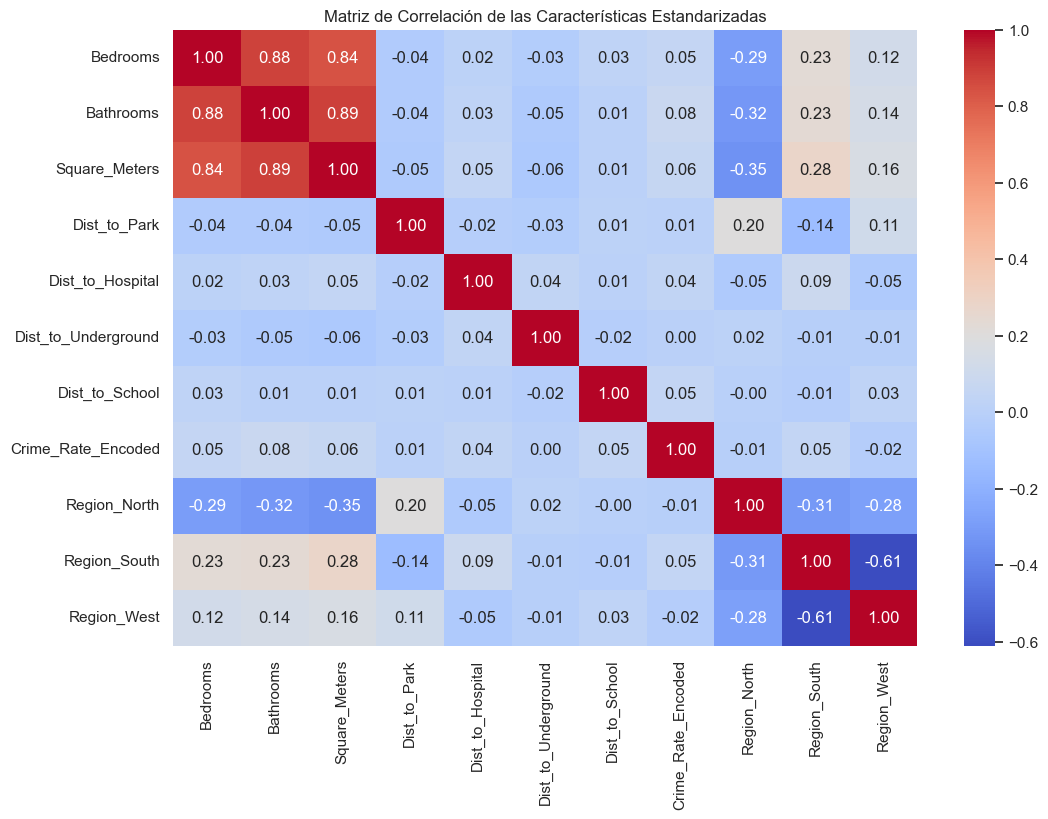

In [ ]:
### TU CÓDIGO AQUÍ ###
corr = pd.DataFrame(X_scaled, columns=features).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de las Características Estandarizadas')
plt.show()

## 3.5. Escribe un análisis sobre las correlaciones observadas. Haz énfasis en las correlaciones más altas (positivas o negativas).

- En este análisis de graficó podemos identifcar que existe una alta correlación entre los baños, cuartos y la cantidad de metros que tiene el area de la casa, con estyo podemos entender que entre más metros contiene una casa, más habitaciones y baños tiende a tener la misma.

- Dada a la relación negativa entre la variable ¨Region_South¨ y ¨Region_West¨, nos da a comprender que entre una vivienda se encuentre más hacia el sur de la ciudad tendra a estar ubicada hacia el oeste y de la misma forma en el sentido contrario pero en menor proporción.

# 4. Aplicando el Análisis de Componentes Principales (PCA)

Con los datos limpios y estandarizados, es hora de aplicar PCA. Nuestro objetivo es determinar cuántos componentes principales necesitamos para capturar una cantidad significativa de la "información" (varianza) de nuestros datos originales.

## 4.1. Instancia PCA. No especifiques n_components para calcularlos todos. Ajusta PCA a los datos escalados.

In [ ]:
### TU CÓDIGO AQUÍ ###
pca = PCA()
pca.fit(X_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


## 4.2. Varianza Explicada

El aspecto más importante de PCA es la **varianza explicada**. Cada componente principal explica un porcentaje de la varianza total de los datos. El primer componente siempre explica la mayor parte, el segundo un poco menos, y así sucesivamente.

Grafica la varianza explicada acumulada para decidir cuántos componentes son suficientes.

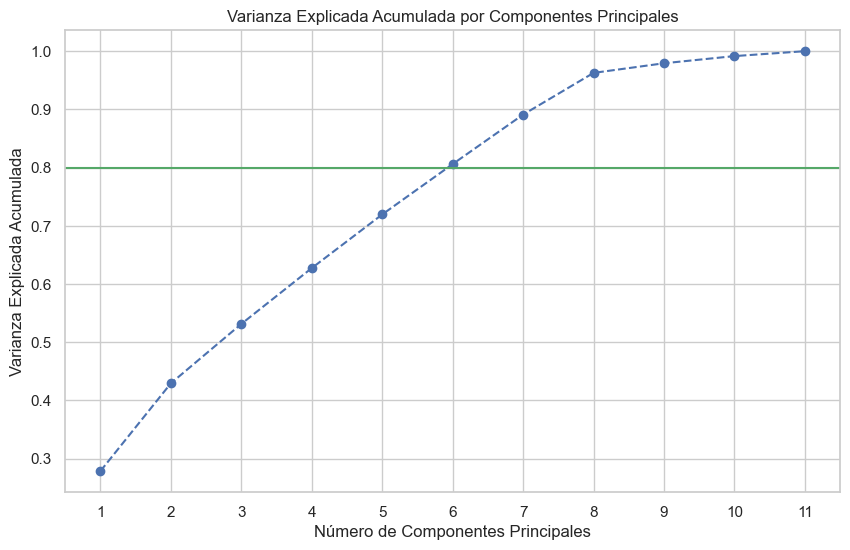

In [ ]:
### TU CÓDIGO AQUÍ ###
varianza_explicada_acumulada =pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.xticks(range(1, len(varianza_explicada_acumulada) + 1))
plt.axhline(y=0.8, color='g', linestyle='-', label='80% de Varianza')
plt.show()

Este gráfico es nuestra herramienta de decisión. Nos muestra el **trade-off entre simplicidad e información**.
- Si queremos el modelo más simple posible, podríamos usar 2 o 3 componentes, pero solo explicaríamos 40-50% de la variabilidad en los datos (perderíamos mucha información).
- Una regla común en la industria es mantener suficientes componentes para explicar entre el 90% y el 95% de la varianza.

## 4.3. ¿Con cuántos componentes se captura el 90% de la información contenida en nuestras 11 variables originales?

Cantidad de componentes necesarios esta entre 7 y 8 para capturar el 90% de la varianza.

# 5. Re-aplicando PCA indicando el Número de Componentes Deseados

Corre PCA de nuevo, pero esta vez especificando que queremos quedarnos con 4 componentes.

In [ ]:
### TU CÓDIGO AQUÍ ###
pca_2 = PCA(n_components=4)
x_pca_2 = pca_2.fit_transform(X_scaled)

print('Dimensiones originales de los datos:', X_scaled.shape)
print('Dimensiones de los datos reducidos:', x_pca_2.shape)

Dimensiones originales de los datos: (1000, 11)
Dimensiones de los datos reducidos: (1000, 4)


In [ ]:
print("Varianza explicada por cada componente principal:")
pca_2.explained_variance_ratio_

Varianza explicada por cada componente principal:


array([0.27836505, 0.15083451, 0.10204937, 0.09597655])

In [ ]:
print("Varianza explicada acumulada por cada componente principal:")
pca_2.explained_variance_ratio_.cumsum()

Varianza explicada acumulada por cada componente principal:


array([0.27836505, 0.42919957, 0.53124893, 0.62722549])

In [ ]:
df_crimen_pca = pd.DataFrame(x_pca_2,
                      columns=['CP1', 'CP2', 'CP3', 'CP4'])
df_crimen_pca['Price'] = y.values
df_crimen_pca.head()


,CP1,CP2,CP3,CP4,Price
0,-2.65,-1.97,-0.54,0.76,550353
1,-2.14,-0.23,-0.29,-0.98,780430
2,-3.51,0.16,1.98,-0.71,455771
3,0.98,1.55,-1.19,-1.42,766631
4,1.43,2.15,0.37,-0.75,757092


Hemos reducido las dimensiones, pero ¿qué significan estas nuevas 4 variables? Para un economista, esta es la parte más importante. Debemos "bautizar" a nuestros componentes entendiendo qué variables originales los componen.

Esto lo hacemos analizando los **loadings** (cargas o pesos) de cada variable original en cada componente.

## 5.1. Grafica el mapa de calor de los loadings

In [ ]:
### TU CÓDIGO AQUÍ ###
df_crimen_loadings = pd.DataFrame(pca_2.components_,
                                  columns=features,
                                  index=['CP1', 'CP2', 'CP3', 'CP4'])
df_crimen_loadings


,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate_Encoded,Region_North,Region_South,Region_West
CP1,0.52,0.54,0.53,-0.07,0.04,-0.04,0.01,0.05,-0.30,0.22,0.08
CP2,0.07,0.07,0.06,0.24,-0.14,-0.04,0.05,-0.05,-0.01,-0.64,0.70
CP3,0.14,0.14,0.10,0.62,-0.05,-0.20,0.19,0.34,0.55,0.01,-0.26
CP4,-0.06,-0.05,-0.05,-0.06,0.55,0.38,0.47,0.53,-0.13,-0.05,0.13


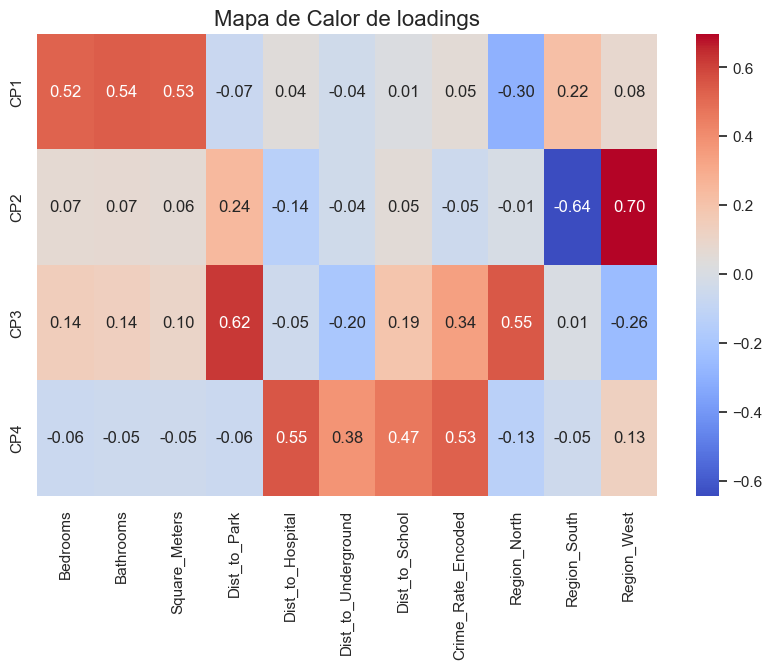

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_crimen_loadings, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de loadings', fontsize=16)
plt.show()

## 5.2. Realiza una interpretación de los componentes. ¿Cuáles variables tienen las cargas altas y positivas y cuáles las cargas altas y negativas? De acuerdo con este análisis, ¿qué nombre le darías a cada componente?

## Analisis de los componentes
En este analisis se uso el suspuesto de que todas las correlaciónes en valor absoluto mayor o igual al 0.50 es considerado relevante y una carga alta.

- CP1 tiene una alta correlación positiva con las variables de los baños, habitaciones y metros cuadrados.
- CP2 tiene una alta correlación positiva con la variable de ubicación hacia el este,una alta correlación negativa con la variable de ubicación hacia el sur
- CP3 tiene una alta correlación positiva con las variables de ubicación que queda cerca al parque y hacia el norte.
- CP4 tiene una alta correlación positiva con las variables de ubicación que queda cerca al hospital y zonas de alta incidencia de crime.

Por el anterior analisis nombramos los componentes de la siguiente manera:
- CP1: ¨Manciones o viviendas de alto lujo¨ debido a la cantidad de habitaciones y metros cuadrados se da esto.
- CP2: ¨Casas de invierno y campestres¨ debido a las variables de ubicación en USA, esta zona es una de las más frias
- CP3: ¨Apartamentos¨ Debido a su ubicación se encuentran en conglomeraciones
- CP4: ¨Kennedy estadounidense¨ debido a su alta incidencia en crimen y con alta cantidad de hospitales se le hace una similitus a Kennedy en Bogotá
